In [2]:
# loads path to your input files : base_processed, base_raw, base_models...
%run init_notebook.py

In [3]:
my_data_file = 'dummy_fin_data.csv'

In [18]:
import pandas as pd
# Read the CSV file into a new DataFrame
df = pd.read_csv(base_raw + my_data_file)

# Display the new DataFrame
print(df)

  host pocket     type geography  amount
0  Brs     AV      act        US    1000
1  Brs     AV      act     India      80
2  Brs    liv      2.5       NaN     500
3  Brs    liv  2.5*0.7       NaN     900
4  Frt    PEA      act     world    2900
5  Frt    CTO      act        US     900
6  Lxa     AV      scp       NaN     700


In [19]:
# essai02
import numpy as np

# Replace NaN values in 'geography' and 'type' with 'not specified'
df['geography'] = df['geography'].fillna('not specified')
df['type'] = df['type'].fillna('not specified')

# Get the unique types
types = df['type'].unique()

# Group by 'geography' and calculate the sum of 'amount' for each 'type'
grouped = df.groupby(['geography', 'type'])['amount'].sum().unstack(fill_value=0)

# Convert the grouped data into a NumPy array of tuples
result_array = np.array([tuple(row) for row in grouped.values])

# Display the result
print(result_array)

[[   0    0   80    0]
 [   0    0 1900    0]
 [ 500  900    0  700]
 [   0    0 2900    0]]


In [20]:
# Display the grouped DataFrame
print(grouped)

# Display the row index (geography values)
print("Row index (geography):", grouped.index.tolist())

# Display the column names (type values)
print("Column names (types):", grouped.columns.tolist())

type           2.5  2.5*0.7   act  scp
geography                             
India            0        0    80    0
US               0        0  1900    0
not specified  500      900     0  700
world            0        0  2900    0
Row index (geography): ['India', 'US', 'not specified', 'world']
Column names (types): ['2.5', '2.5*0.7', 'act', 'scp']


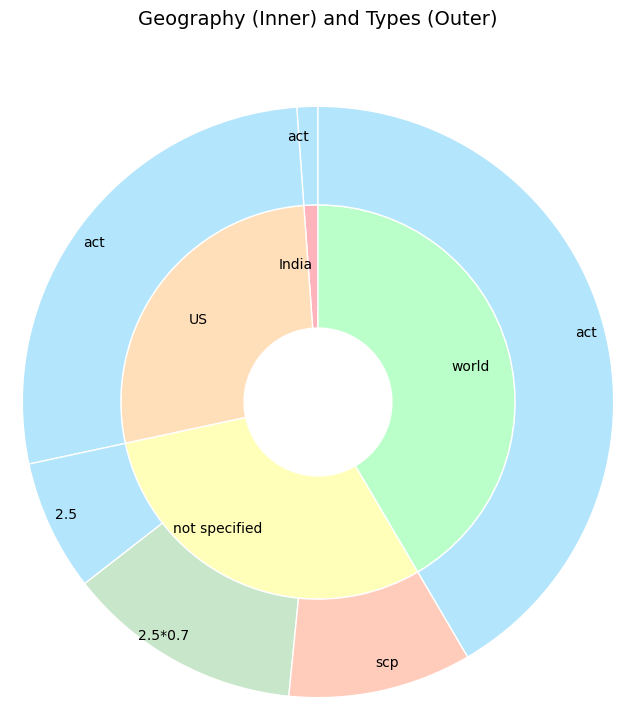

In [38]:
import matplotlib.pyplot as plt

# Replace NaN values in 'geography' and 'type' with 'not specified'
df['geography'] = df['geography'].fillna('not specified')
df['type'] = df['type'].fillna('not specified')

# Group by 'geography' and calculate the sum of 'amount'
grouped_geography = df.groupby('geography')['amount'].sum()

# Group by 'geography' and 'type' to calculate the sum of 'amount'
grouped_type = df.groupby(['geography', 'type'])['amount'].sum()

# Define pastel colors for the inner pie (geography)
pastel_colors_inner = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']

# Define a color palette for the outer pie (type)
outer_colors = ['#B3E5FC', '#C8E6C9', '#FFCCBC', '#D1C4E9', '#F8BBD0', '#F0F4C3']

# Create the figure
plt.figure(figsize=(8, 8))

# Plot the inner pie chart (geography)
plt.pie(
    grouped_geography,
    labels=grouped_geography.index,  # Labels for geography
    startangle=90,
    colors=pastel_colors_inner,    # you may want to comment this out to see bright colors instead
    radius=0.8,  # Inner radius
    wedgeprops=dict(width=0.5, edgecolor='w'),  # Donut style
    pctdistance=1.25, labeldistance=.7
)

# Prepare data for the outer pie chart
outer_sizes = []
outer_labels = []
outer_colors_list = []

for geography in grouped_geography.index:
    # Get the type distribution for the current geography
    type_distribution = grouped_type.loc[geography]
    outer_sizes.extend(type_distribution.values)
    outer_labels.extend(type_distribution.index)
    outer_colors_list.extend(outer_colors[:len(type_distribution)])

# Plot the outer pie chart (type within each geography)
plt.pie(
    outer_sizes,
    labels=outer_labels,  # Labels for types
    startangle=90,
    colors=outer_colors_list,
    radius=1.2,  # Outer radius
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=1.25, labeldistance=.9
)

# Add a title
plt.title('Geography (Inner) and Types (Outer)', fontsize=14, y=1.1)

# Show the plot
plt.show()

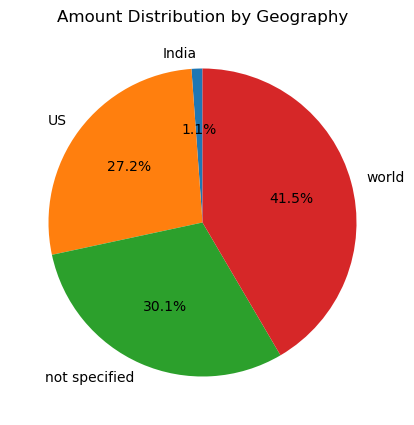

In [ ]:
import matplotlib.pyplot as plt

# Replace NaN values in 'geography' with 'not specified'
df['geography'] = df['geography'].fillna('not specified')

# Group the data by 'geography' and sum the 'amount'
grouped_data = df.groupby('geography')['amount'].sum()

# Define pastel colors
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']

# Create a pie chart with pastel colors
plt.figure(figsize=(5, 5))
grouped_data.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',
    title='Amount Distribution by Geography',
    colors=pastel_colors    # you may want to comment this out to see bright colors instead
)

# Show the plot
plt.show()

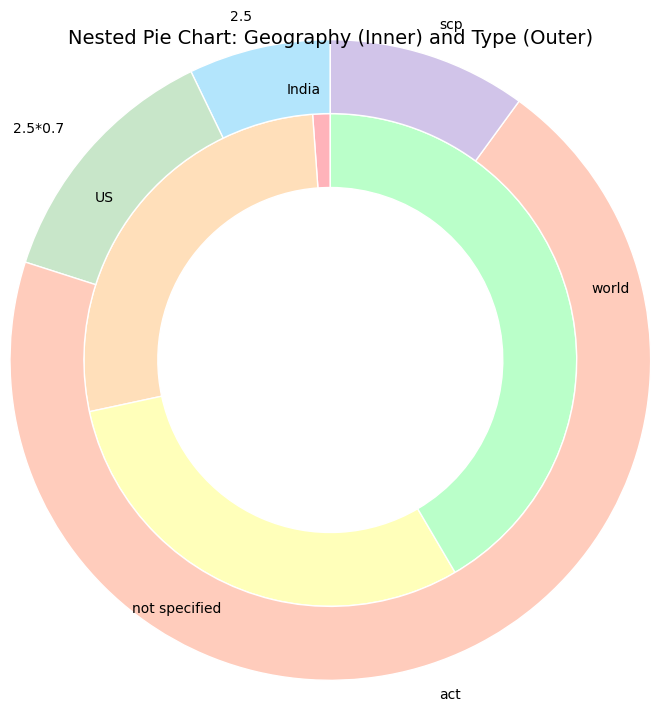

In [17]:
import matplotlib.pyplot as plt

# Replace NaN values in 'geography' and 'type' with 'not specified'
df['geography'] = df['geography'].fillna('not specified')
df['type'] = df['type'].fillna('not specified')

# Group the data by 'geography' and sum the 'amount'
grouped_geography = df.groupby('geography')['amount'].sum()

# Group the data by 'type' and sum the 'amount'
grouped_type = df.groupby('type')['amount'].sum()

# Define pastel colors for the inner pie (geography)
pastel_colors_inner = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']

# Define pastel colors for the outer ring (type)
pastel_colors_outer = ['#B3E5FC', '#C8E6C9', '#FFCCBC', '#D1C4E9', '#F8BBD0']

# Create the figure
plt.figure(figsize=(8, 8))

# Plot the inner pie chart (geography)
plt.pie(
    grouped_geography,
    labels=grouped_geography.index,  # Add labels outside the slices
    startangle=90,
    colors=pastel_colors_inner,
    radius=1,  # Inner radius
    wedgeprops=dict(width=0.3, edgecolor='w')  # Donut style
)

# Plot the outer ring (type)
plt.pie(
    grouped_type,
    labels=grouped_type.index,  # Add labels outside the slices
    startangle=90,
    colors=pastel_colors_outer,
    radius=1.3,  # Outer radius
    wedgeprops=dict(width=0.3, edgecolor='w')  # Donut style
)

# Add a title
plt.title('Nested Pie Chart: Geography (Inner) and Type (Outer)', fontsize=14)

# Show the plot
plt.show()